# Unit Project 3: Basic Machine Learning Modeling

## Logistic Regression

In [56]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

import statsmodels.formula.api as smf

from sklearn import linear_model as lm

In [28]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))
df.dropna(inplace = True)

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Part A.  Frequency Table

> ### Question 1.  Create a frequency table for `prestige` and whether or not an applicant was admitted.

In [29]:
frequency_table = pd.crosstab(index=df['prestige'],
                              columns=df['admit'],
                             margins=True)
frequency_table.columns = ['0','1', 'row_total']
frequency_table.index= ['1.0','2.0','3.0','4.0', 'column_total']
frequency_table

,0,1,row_total
1.0,28,33,61
2.0,95,53,148
3.0,93,28,121
4.0,55,12,67
column_total,271,126,397


## Part B.  Variable Transformations

> ### Question 2.  Create a one-hot encoding for `prestige`.

In [42]:
#I had trouble using OneHotEncoder from sklearn, so I went with get_dummies from Pandas instead.
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


> ### Question 3.  How many of these binary variables do we need for modeling?

The number of binary variables needed to present the original feature is equal to the number of categories in that feature, minus one. In the case of prestige, we need three because prestige has four categories.

> ### Question 4.  Why are we doing this?

Regression treats all variables as numeric and therefore has trouble handling categorical variables. Breaking a categorical feature into binary variables helps the regression algorithm correctly interpret the categorical feature.

> ### Question 5.  Add all these binary variables in the dataset and remove the now redundant `prestige` feature.

In [45]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0.0,1.0,0.0
1,1,660.0,3.67,0.0,1.0,0.0
2,1,800.0,4.00,0.0,0.0,0.0
3,1,640.0,3.19,0.0,0.0,1.0
4,0,520.0,2.93,0.0,0.0,1.0
...,...,...,...,...,...,...
395,0,620.0,4.00,1.0,0.0,0.0
396,0,560.0,3.04,0.0,1.0,0.0
397,0,460.0,2.63,1.0,0.0,0.0
398,0,700.0,3.65,1.0,0.0,0.0


## Part C.  Hand calculating odds ratios

Let's develop our intuition about expected outcomes by hand calculating odds ratios.

> ### Question 6.  Create a frequency table for `prestige = 1` and whether or not an applicant was admitted.

In [50]:
frequency_table_2 = pd.crosstab(index=df['admit'],
                              columns=df['prestige'])
frequency_table_2.columns = ['1.0','2.0','3.0','4.0']
frequency_table_2.index= ['0','1']
frequency_table_2['1.0']

0    28
1    33
Name: 1.0, dtype: int64

> ### Question 7.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the most prestigious undergraduate schools.

In [ ]:
33:28

> ### Question 8.  Now calculate the odds of admission for undergraduates who did not attend a #1 ranked college.

In [51]:
frequency_table_3 = pd.crosstab(index=df['admit'],
                              columns=df['prestige'],
                             margins=True)
frequency_table_3.columns = ['1.0','2.0','3.0','4.0', 'row_total']
frequency_table_3.index= ['0','1', 'column_total']
frequency_table_3

,1.0,2.0,3.0,4.0,row_total
0,28,95,93,55,271
1,33,53,28,12,126
column_total,61,148,121,67,397


In [ ]:
31:81

> ### Question 9.  Finally, what's the odds ratio?

In [115]:
33.0/28.0

1.1785714285714286

> ### Question 10.  Write this finding in a sentenance.

If prestige = 1, the odds ratio is 1.2, meaning that graduates from top-tier undergraduate schools have a chance of gaining admission to UCLA, (their odds increase by 20%).

> ### Question 11.  Use the frequency table above to calculate the odds of being admitted to graduate school for applicants that attended the least prestigious undergraduate schools.  Then calculate their odds ratio of being admitted to UCLA.  Finally, write this finding in a sentenance.

In [118]:
12.0/55

0.21818181818181817

If prestige = 4, the odds are .22, meaning that the odds of their gaining admission to UCLA decreases by 22%.

## Part C. Analysis using `statsmodels`

> ### Question 12.  Fit a logistic regression model prediting admission into UCLA using `gre`, `gpa`, and the prestige of the undergraduate schools.  Use the highest prestige undergraduate schools as your reference point.

In [52]:
train_data = data.columns[1:]

model = smf.Logit(data['admit'], data[train_data])

result = model.fit()


Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


> ### Question 13.  Print the model's summary results.

In [53]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Mon, 16 Jan 2017   Pseudo R-squ.:                 0.05722
Time:                        19:23:46   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191        -0.001     0.003
gpa             -0.1323      0.195     -0.680      0.497        -0.514     0.249
prestige_2.0    -0.9562      0.302     -3.171      0.002        -1.547    -0.365
prestige_3.0    -1.5375      0.332     -4.627      0.000        -2.189    -0.886
prestige_4.0    -1.8699      0.401     -4.658      0.000        -2.657    -1.083
================================================================================
"""

> ### Question 14.  What are the odds ratios of the different features and their 95% confidence intervals?

In [54]:
np.exp(result.params)

gre             1.001368
gpa             0.876073
prestige_2.0    0.384342
prestige_3.0    0.214918
prestige_4.0    0.154135
dtype: float64

In [55]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
gre,0.999320,1.003420,1.001368
gpa,0.598303,1.282800,0.876073
prestige_2.0,0.212826,0.694082,0.384342
prestige_3.0,0.112055,0.412207,0.214918
prestige_4.0,0.070176,0.338540,0.154135


> ### Question 15.  Interpret the odds ratio for `prestige = 2`.

If prestige = 2, the odds of admission decrease by about 38%.

> ### Question 16.  Interpret the odds ratio of `gpa`.

As GPA decreases, the odds of admission decrease by 87%.

> ### Question 17.  Assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [73]:
data['admit_prob'] = result.predict(data[train_data])

In [76]:
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,admit_prob
0,0,380.0,3.61,0.0,1.0,0.0,0.183053
1,1,660.0,3.67,0.0,1.0,0.0,0.245811
2,1,800.0,4.00,0.0,0.0,0.0,0.637399
3,1,640.0,3.19,0.0,0.0,1.0,0.195080
4,0,520.0,2.93,0.0,0.0,1.0,0.175530


In [77]:
df['admit_prob'] = result.predict(data[train_data])

In [78]:
df.head()

,admit,gre,gpa,prestige,admit_prob
0,0,380.0,3.61,3.0,0.183053
1,1,660.0,3.67,3.0,0.245811
2,1,800.0,4.00,1.0,0.637399
3,1,640.0,3.19,4.0,0.195080
4,0,520.0,2.93,4.0,0.175530


/Users/barbara/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<Container object of 5 artists>

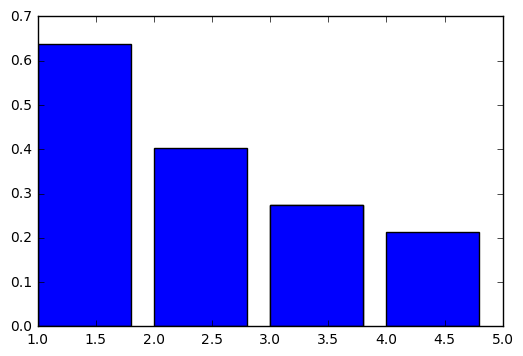

In [97]:
from matplotlib import pyplot as plt
%matplotlib inline
df['prestige'] = df['prestige'].astype('category')
df2 = df[df['gre'].isin([800.0])]
df2 = df2[df['gpa'].isin([4.0])]
x = df2['prestige']
y = df2['admit_prob']
plt.bar(x,y)

Probability of admission for students with a GPA of 4.0 and a GRE score of 800 drops from about 64%, to 40%, to 25%, to 20% as the prestige of their undergraduate school drops.

## Part D. Moving the model from `statsmodels` to `sklearn`

> ### Question 18.  Let's assume we are satisfied with our model.  Remodel it (same features) using `sklearn`.  When creating the logistic regression model with `LogisticRegression(C = 10 ** 2)`.

In [58]:
model_2 = lm.LogisticRegression(fit_intercept = False)
mdl = model_2.fit(data[train_data],data['admit'])
model_2.coef_

array([[  1.30273255e-03,  -1.83440262e-01,  -7.25687989e-01,
         -1.26366831e+00,  -1.51119950e+00]])

> ### Question 19.  What are the odds ratios for the different variables and how do they compare with the odds ratios calculated with `statsmodels`?

In [62]:
np.exp(model_2.coef_)

array([[ 1.00130358,  0.8324016 ,  0.48399147,  0.2826154 ,  0.22064516]])

The odds ratios from sklearn are slightly different from those calculated using statsmodels. Here's how they match up:

feature | statsmodels | sklearn
---| ---| ---
**gre** |1.001368  | 1.00130358
**gpa** | 0.876073 | 0.8324016
**prestige_2**| 0.384342| 0.48399147
**prestige_3** | 0.214918| 0.2826154
**prestige_4** | 0.154135 | 0.22064516

With sklearn, the odds ratios for GRE and GPA are slightly lower, and the odds ratios for the prestige features are slightly higher. 

> ### Question 20.  Again assuming a student with a GRE of 800 and a GPA of 4.  What is his/her probability of admission  if he/she come from a tier-1, tier-2, tier-3, or tier-4 undergraduate school?

In [ ]:
data['sk_admit_pred'] = mdl.predict(data[test_data])

In [124]:
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,admit_prob,sk_admit_pred
0,0,380.0,3.61,0.0,1.0,0.0,0.183053,0
1,1,660.0,3.67,0.0,1.0,0.0,0.245811,0
2,1,800.0,4.00,0.0,0.0,0.0,0.637399,1
3,1,640.0,3.19,0.0,0.0,1.0,0.195080,0
4,0,520.0,2.93,0.0,0.0,1.0,0.175530,0
